<a href="https://colab.research.google.com/github/mayuresh23sawant/Finance/blob/master/Finance_101_Stocks_Data_Analysis_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT OVERVIEW

For investors to properly manage their portfolios, they need to visualize the data, find useful patterns and gain insights such as daily returns and risks. 

In this project, i'll be performing stock data EDA and calculate stock returns. 

# IMPORT DATASETS AND LIBRARIES

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Ever since Yahoo! finance decommissioned their historical data API, many programs that relied on it to stop working.

yfinance is an unofficial Python package that I'll be using to download the latest stock data. 

In [1]:
!pip install -Uqq yfinance

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from copy import copy
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import yfinance as yf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


I'll be playing around with the data of the following stocks. 

- AAPL = Apple Stock 
- BA = Boeing 
- T = AT&T
- MGM = MGM Resorts International (Hotel Industry)
- AMZN = Amazon
- IBM = IBM
- TSLA = Tesla Motors
- GOOG = Google 
- INX = S&P 500

In [3]:
tickers = ["AAPL","BA", "T", "MGM", "AMZN", "IBM", "TSLA", "GOOG", "SP500"]
prices = pd.DataFrame(columns=tickers)

In [4]:
yf_tickers = [yf.Ticker(ticker) for ticker in tickers]
close_prices = [yf_ticker.history(period="max")['Close'] for yf_ticker in yf_tickers]

- SP500: No data found, symbol may be delisted


```
SP500: No data found, symbol may be delisted
```
For some reason I wasn't able to fetch the S&P 500 data from yfinance. 

I have downloaded the closing prices for each stock even since they existed. 

Seems like Boeing and IBM existed way earlier than any of the other companies. 

In [5]:
prices = pd.concat(close_prices[:-1],axis=1)
prices.set_axis(tickers[:-1], axis=1, inplace=True)
prices.head()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG
Date,,,,,,,,
1962-01-02,NaN,0.15,NaN,NaN,NaN,0.60,NaN,NaN
1962-01-03,NaN,0.15,NaN,NaN,NaN,0.61,NaN,NaN
1962-01-04,NaN,0.15,NaN,NaN,NaN,0.60,NaN,NaN
1962-01-05,NaN,0.14,NaN,NaN,NaN,0.59,NaN,NaN
1962-01-08,NaN,0.14,NaN,NaN,NaN,0.58,NaN,NaN


Let's take a look at the latest data at the bottom. 

In [ ]:
prices.tail()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG
Date,,,,,,,,
2020-09-22,111.81,156.80,28.51,21.62,3128.99,120.51,424.23,1465.46
2020-09-23,107.12,151.18,27.87,21.38,2999.86,118.83,380.36,1415.21
2020-09-24,108.22,146.05,28.04,21.19,3019.79,118.09,387.79,1428.29
2020-09-25,112.28,156.03,28.04,22.10,3095.13,118.95,407.34,1444.96
2020-09-28,114.96,166.08,28.38,22.63,3174.05,121.73,421.20,1464.52


In [ ]:
prices.describe()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG
count,10033.000000,14787.000000,9290.000000,8168.000000,5882.000000,14787.000000,2581.000000,4056.000000
mean,8.667608,38.804545,13.434874,17.341097,392.021702,39.000690,49.379702,532.173368
std,17.048643,72.607889,10.030173,15.156175,628.502058,49.173006,58.560397,384.246355
min,0.040000,0.090000,0.190000,1.790000,1.400000,0.320000,3.160000,49.820000
25%,0.230000,0.540000,4.290000,7.340000,38.055000,1.600000,7.120000,240.150000
50%,0.370000,10.460000,12.830000,12.660000,84.215000,7.100000,43.920000,342.570000
75%,9.120000,40.755000,19.690000,23.100000,370.575000,68.655000,59.040000,771.275000
max,134.180000,430.300000,37.770000,94.280000,3531.450000,161.210000,498.320000,1728.280000


# EXPLORATORY DATA ANALYSIS AND VISUALIZATION

Let's visualize the data and see how these stocks have performed over their lifetimes.

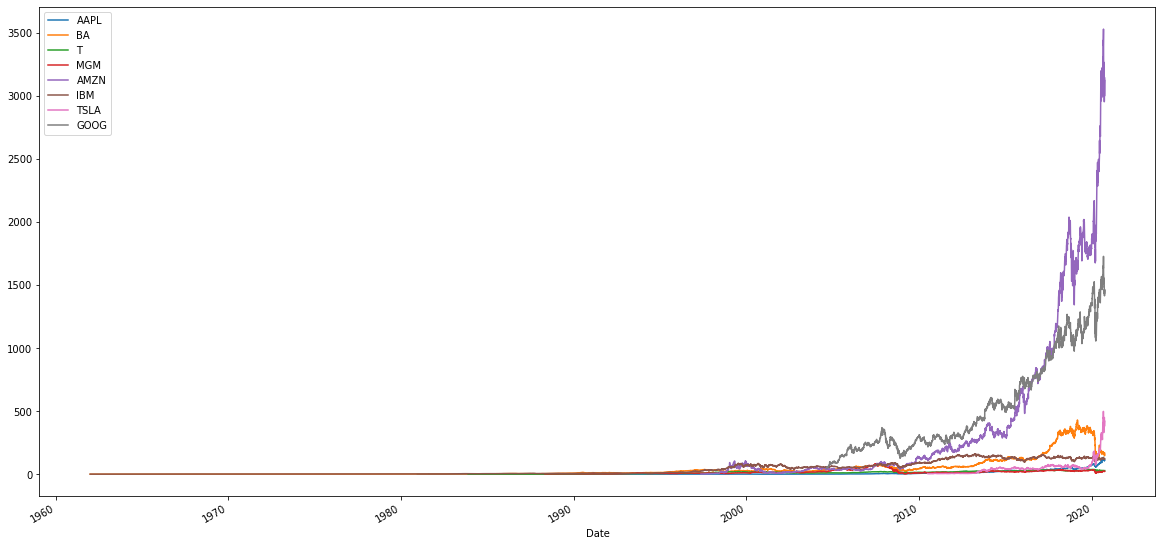

In [ ]:
prices.plot(figsize=(20,10))

Since most of the X-axis looks kinda empty, I'll truncate the data to include information since each one of them debuted publicly. The latest one is Tesla. 

In [6]:
prices_notnull = prices.dropna()
prices_notnull.head()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG
Date,,,,,,,,
2010-06-29,7.91,49.36,13.90,9.50,108.61,89.15,4.78,226.28
2010-06-30,7.76,49.14,13.74,9.11,109.26,88.01,4.77,221.64
2010-07-01,7.67,48.75,13.83,9.17,110.96,87.36,4.39,218.92
2010-07-02,7.62,48.50,13.80,8.96,109.14,86.85,3.84,217.46
2010-07-06,7.67,48.05,13.87,8.76,110.06,87.99,3.22,217.22


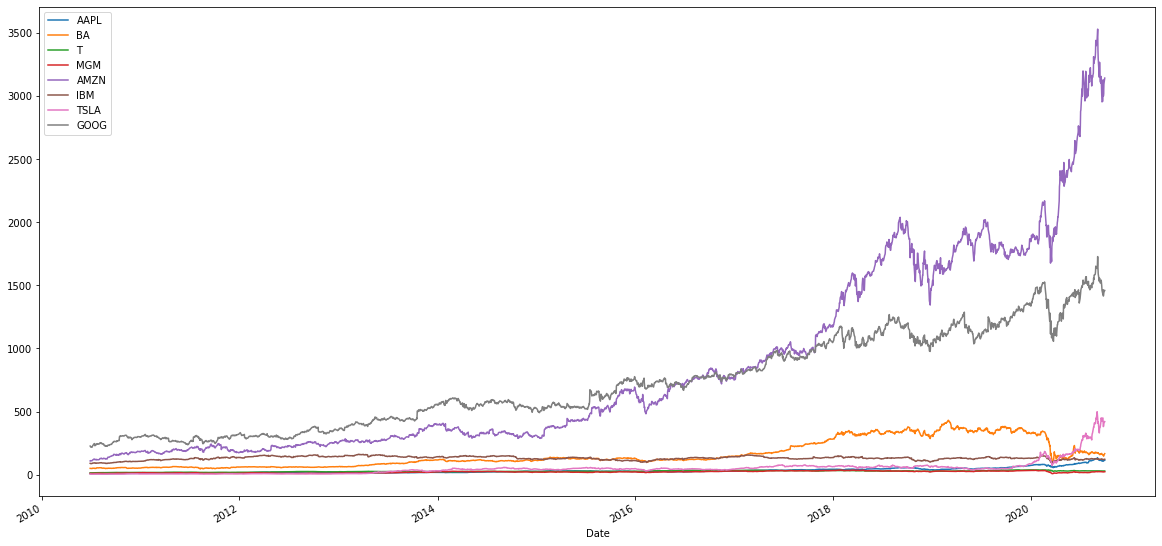

In [ ]:
# Plot the data
prices_notnull.plot(figsize=(20,10))

Since even this plot is somewhat difficult to follow, I'll make use of plotly express to make an interactive plot. 

# INTERACTIVE DATA VISUALIZATION

In [8]:
# Function to perform an interactive data plotting using plotly express
# Plotly.express module which is imported as px includes functions that can plot interactive plots easily and effectively. 
# Every Plotly Express function uses graph objects internally and returns a plotly.graph_objects.Figure instance. 
def interactive_plot(df,title):
  fig = px.line(title=title)

  for i in df.columns:
    fig.add_scatter(x=df.index, y=df[i], name=i)
  fig.show()

In [ ]:
# Plot interactive chart
interactive_plot(prices_notnull, 'Prices')

Some observations:

- The effects of the COVID-19 pandemic can be clearly seen during mid-March. Every stock goes down. 
- I regret not buying some Amazon stocks just before the pandemic :( Jeff Bezos who was already the world’s richest person, has grown his wealth by \$73.2bn since the start of the crisis to a record \$186.2bn. A 65% increase. 
- Elon Musk, has also benefited from the pandemic. His estimated fortune has risen by **274%**, to $92bn.
- But COVID has affected Boeing the worst. The travel bans, lockdowns and uncertainity of air travel plummeted their stocks badly. 

To get more insigts, I'll normalize he stocks to see which stock performed well compared to itself. 




In [7]:
def normalize(df):
  x = df.copy()
  for i in x.columns:
    x[i] = x[i]/x[i][0]
  return x

In [ ]:
interactive_plot(normalize(prices_notnull), 'Normalized Prices')

If you zoom in, you can also see the stocks of MGM Resorts plummet along with Boeing.  

# MULTIPLE STOCKS DAILY RETURNS

Now I will make a table to calculate the daily returns in percentage of each stock. 

In [15]:
# Let's define a function to calculate stocks daily returns (for all stocks) 
def daily_return(df):
  df_daily_return = df.copy()
  # loop on tickers
  for i in df.columns:
    # loop on each date
    for j in range(1,len(df)):
      df_daily_return[i][j] = ( (df[i][j] - df[i][j-1])/df[i][j-1])*100

    df_daily_return[i][0] = 0

  return df_daily_return

In [16]:
df_daily_returns = daily_return(prices_notnull)

In [17]:
df_daily_returns.head()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG
Date,,,,,,,,
2010-06-29,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-06-30,-1.896334,-0.445705,-1.151079,-4.105263,0.598472,-1.278744,-0.209205,-2.050557
2010-07-01,-1.159794,-0.793651,0.655022,0.658617,1.555922,-0.738552,-7.966457,-1.227215
2010-07-02,-0.651890,-0.512821,-0.216920,-2.290076,-1.640231,-0.583791,-12.528474,-0.666910
2010-07-06,0.656168,-0.927835,0.507246,-2.232143,0.842954,1.312608,-16.145833,-0.110365


In [ ]:
df_daily_returns.head()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG
Date,,,,,,,,
2010-06-29,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-06-30,-108.333392,-169.920932,-126.929641,-115.701394,-213.131134,-428.835399,-104.824754,-362.143214
2010-07-01,-107.079996,-128.689814,-110.895800,-107.925574,-152.061845,-120.371453,-104.187942,-160.451223
2010-07-02,-107.116175,-137.687520,-112.444114,-108.302017,-171.773429,-172.151659,-103.685647,-235.530285
2010-07-06,-107.160450,-134.897861,-112.335016,-108.088492,-164.072773,-151.111909,-103.105541,-192.225932


In [18]:
interactive_plot(df_daily_returns, 'Daily Returns')

# CALCULATE THE CORRELATIONS BETWEEN DAILY RETURNS 

In [21]:
# Daily Return Correlation
cm = df_daily_returns.corr()

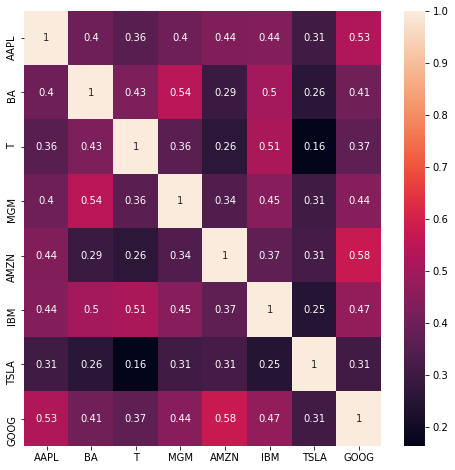

In [23]:
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True)

# DAILY RETURNS HISTOGRAMs

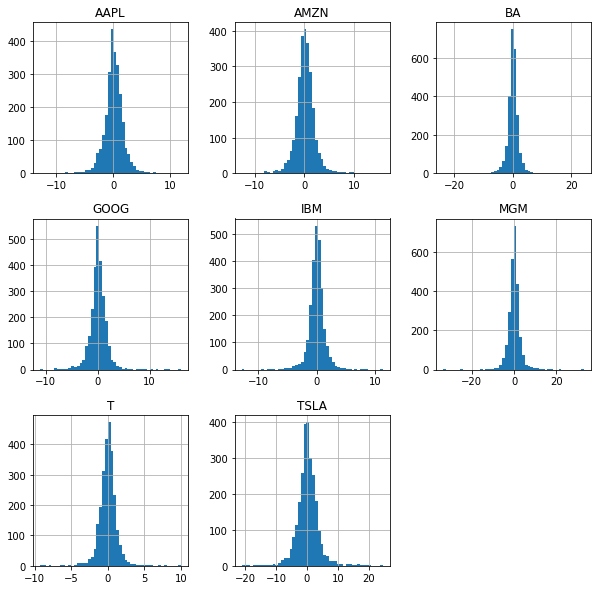

In [27]:
# Histogram of daily returns
# Stock returns are normally distributed with zero mean 
# Notice how Tesla Standard deviation is high indicating a more volatile stock
df_daily_returns.hist(figsize=(10,10), bins=50);

In [28]:
# Group all data returns together in a list
# Make a copy of the daily returns dataframe
df_hist = df_daily_returns.copy()

data = []

for i in df_hist:
  data.append(df_daily_returns[i].values) 

In [30]:
# Plotly's Python API contains a super pwerful module known as figure factory module 
# Figure factory module includes wrapper functions that create unique chart types such as interactive subplots 
# Check this out for more information: https://plotly.com/python/figure-factory-subplots/

fig = ff.create_distplot(data, df_hist.columns)
fig.show()

As it can be seen in the histograms, Tesla is really volatile. AT&T on the other hand seems like the least volatile stock. 